# NSW Government Virtual Program Data Analysis Case Study

Created by Wyun Ng on 15 May 2023

Table of content: 
1. Import Libraries					             				           
2. Data Loading
3. Data Normalization
4. Exploratory Data Analysis (EDA)
5. Part 1: Trends over time in male and female employment, including any notable changes
6. Part 2: The current representation of part time employees in the sector and in each Cluster
7. Part 3: Current Representation of Male and Female Part-Time Employees
8. Part 4: Change in Statistics Over the Last 4 Years
9. Part 5: Projection of Part-Time Employee Representation by 2025

#### Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Data Loading

In [11]:
df = pd.read_excel('./Data Analysis - Data Sheets.xlsx', sheet_name="PT & FT Data PivotTable format")

Data Normalization

In [12]:
# Normalize column names and categorical values
df.columns = df.columns.str.lower()
df[['cluster', 'agency', 'pt/ft', 'gender']] = df[['cluster', 'agency', 'pt/ft', 'gender']].apply(lambda x: x.str.lower())

#### Exploratory Data Analysis (EDA)

In [13]:
df.head(10)
print(f'Number of rows: {df.shape[0]} | Columns (variables): {df.shape[1]}')
df.describe()

Number of rows: 1840 | Columns (variables): 6


,year,headcount
count,1840.000000,1840.000000
mean,2016.000000,1028.171739
std,1.414598,3003.876102
min,2014.000000,5.000000
25%,2015.000000,20.000000
50%,2016.000000,113.500000
75%,2017.000000,746.250000
max,2018.000000,41521.000000


#### Part 1: Trends over time in male and female employment, including any notable changes

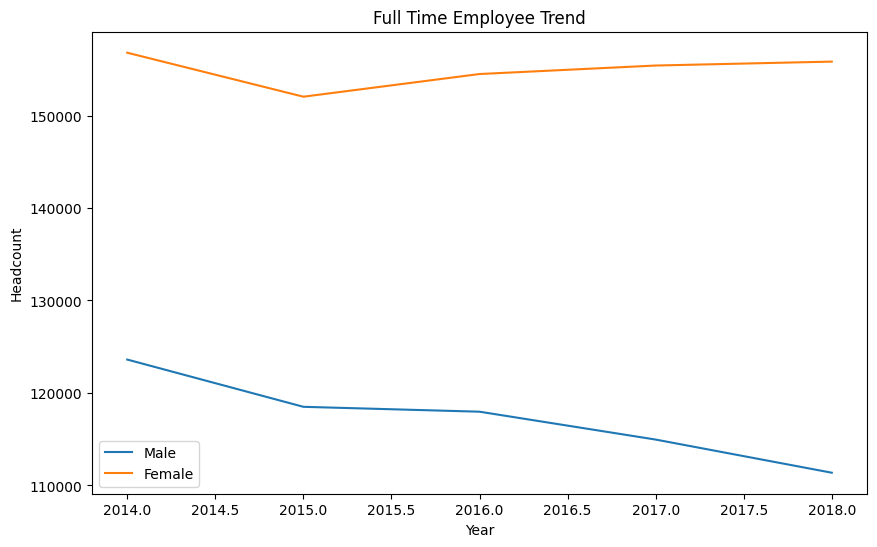

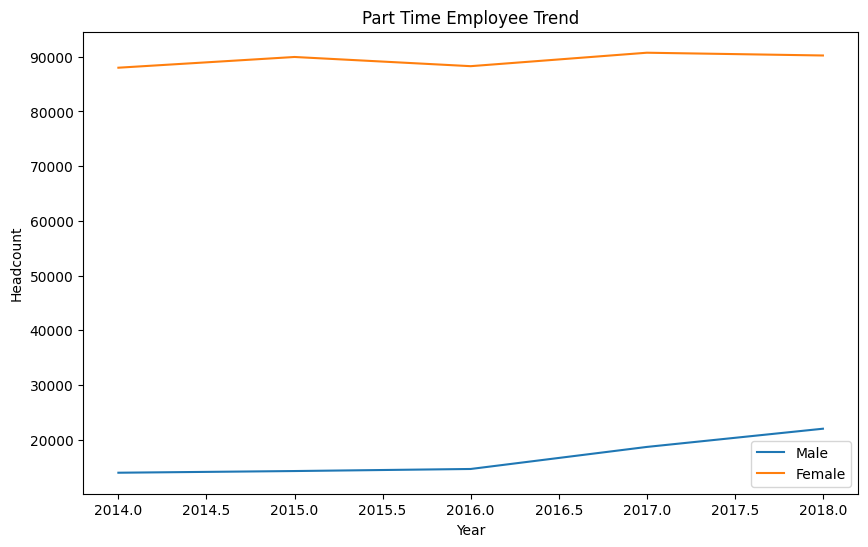

In [14]:
# Create subsets of data for full-time and part-time, males and females
ft_male = df[(df.gender == 'male') & (df['pt/ft'] == 'full-time')]
ft_female = df[(df.gender == 'female') & (df['pt/ft'] == 'full-time')]
pt_male = df[(df.gender == 'male') & (df['pt/ft'] == 'part-time')]
pt_female = df[(df.gender == 'female') & (df['pt/ft'] == 'part-time')]

# Group by year and sum headcount for each subset
time_ft_male = ft_male.groupby('year').headcount.sum()
time_ft_female = ft_female.groupby('year').headcount.sum()
time_pt_male = pt_male.groupby('year').headcount.sum()
time_pt_female = pt_female.groupby('year').headcount.sum()

# Merge the male and female dataframes for full-time and part-time
time_ft = pd.concat([time_ft_male, time_ft_female], axis=1)
time_ft.columns = ['Male', 'Female']
time_pt = pd.concat([time_pt_male, time_pt_female], axis=1)
time_pt.columns = ['Male', 'Female']

# Plot the data
# Full Time Job Trend
plt.figure(figsize=(10, 6))
plt.plot(time_ft['Male'], label='Male')
plt.plot(time_ft['Female'], label='Female')
plt.title('Full Time Employee Trend')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.legend()
plt.show()

# Part Time Job Trend
plt.figure(figsize=(10, 6))
plt.plot(time_pt['Male'], label='Male')
plt.plot(time_pt['Female'], label='Female')
plt.title('Part Time Employee Trend')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.legend()
plt.show()

#### Part 2: The current representation of part time employees in the sector and in each Cluster

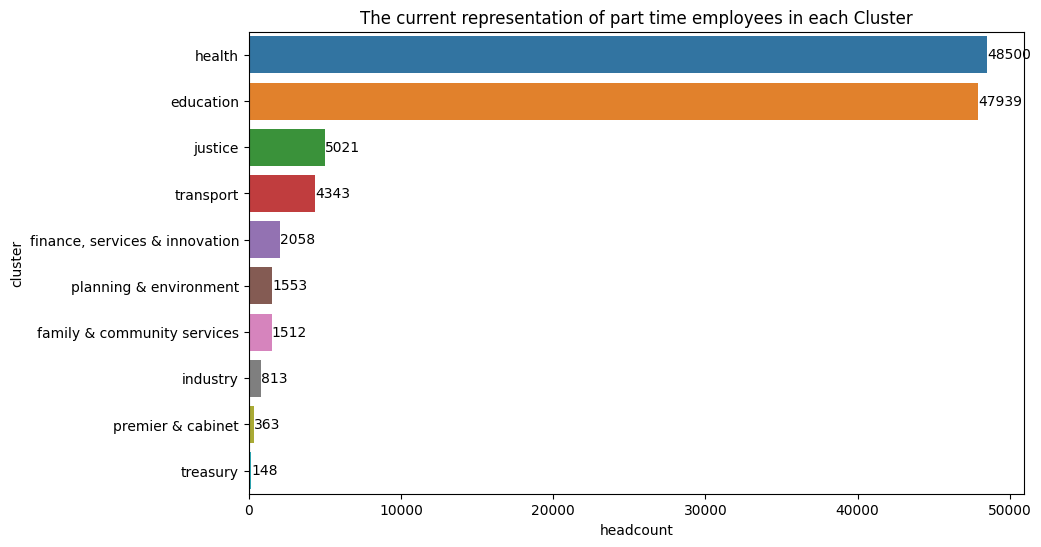

In [15]:
# Extract data for part-time employees for the latest year in the dataset (2018)
pt_cluster = df[(df['pt/ft'] == 'part-time') & (df.year == 2018)]
pt_cluster = pt_cluster.groupby('cluster').headcount.sum()

# Convert the series to a dataframe and sort it in descending order
pt_cluster = pd.DataFrame(pt_cluster)
pt_cluster = pt_cluster.sort_values(by='headcount', ascending=False)

# Plot the current representation of part-time employees in each cluster
plt.figure(figsize=(10,6))
sns.barplot(x=pt_cluster.headcount , y=pt_cluster.index)
plt.title('The current representation of part time employees in each Cluster')
for i in range(pt_cluster.shape[0]):
    plt.text(x=pt_cluster.headcount[i], y=i, s=pt_cluster.headcount[i], va='center')
plt.show()

#### Part 3: Current Representation of Male and Female Part-Time Employees

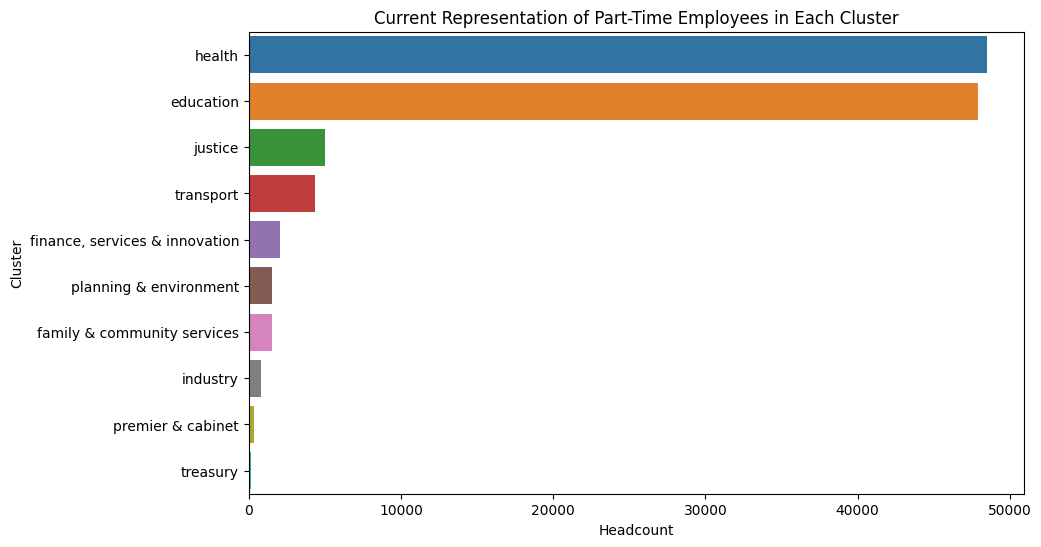

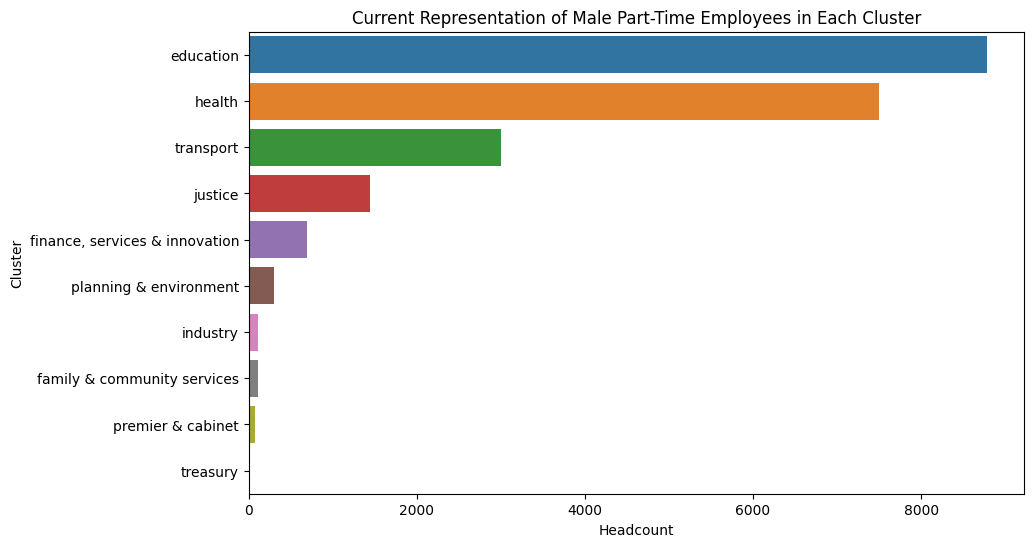

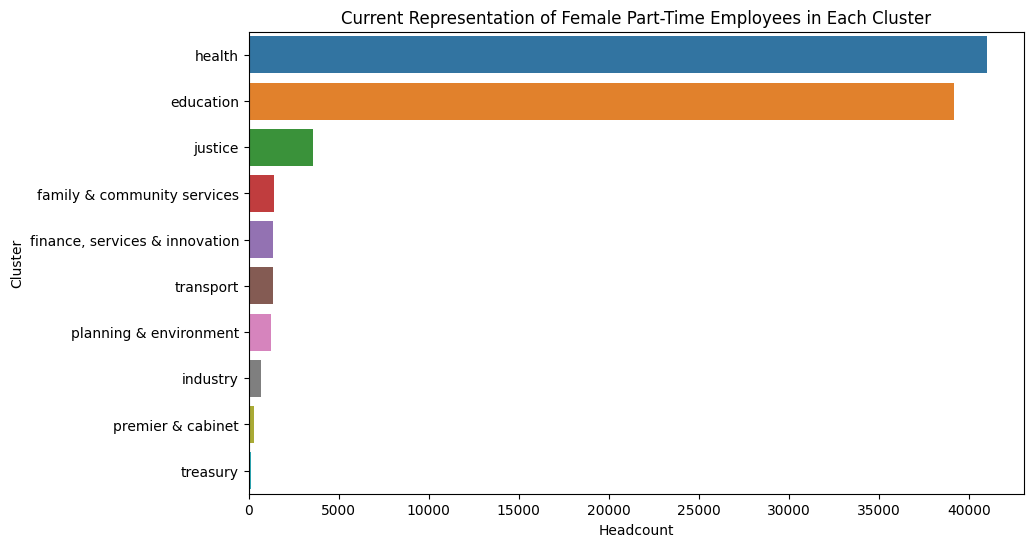

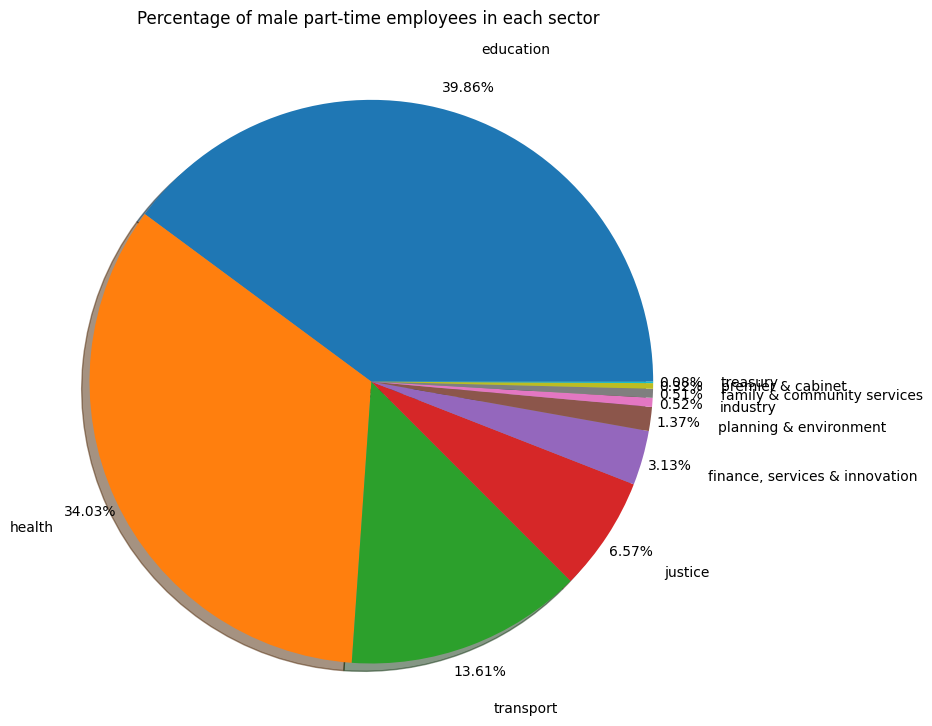

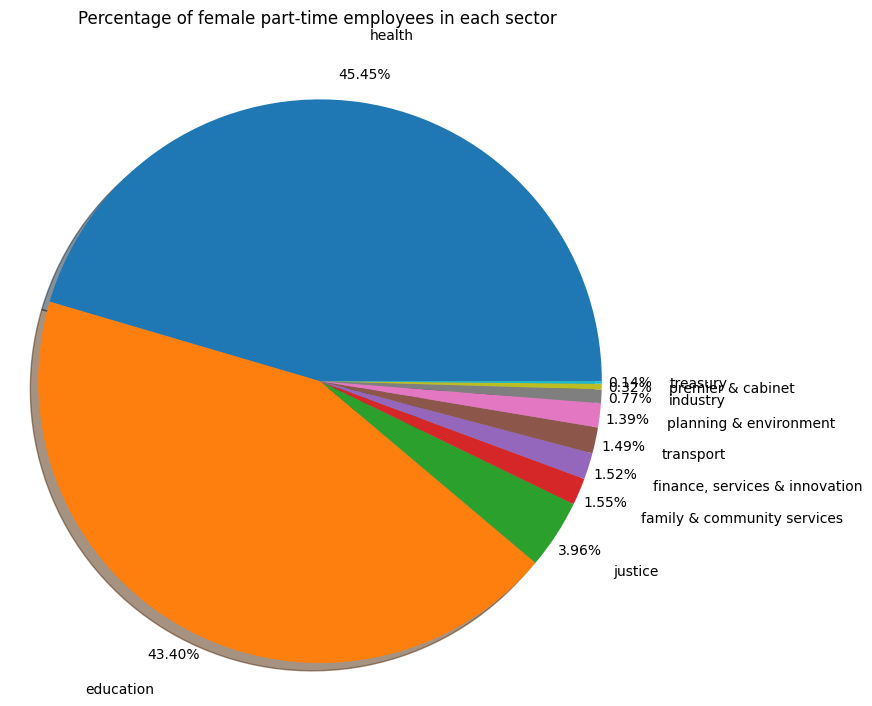

In [16]:
# Filter data for part-time employees in 2018
pt_data = df[(df['pt/ft'] == 'part-time') & (df.year == 2018)] 

# Find headcounts of part-time employees by cluster
pt_cluster_data = pt_data.groupby('cluster').headcount.sum().sort_values(ascending=False)

# Plot the headcounts
plt.figure(figsize=(10, 6))
plt.title('Current Representation of Part-Time Employees in Each Cluster')
sns.barplot(x=pt_cluster_data, y=pt_cluster_data.index)
plt.xlabel('Headcount')
plt.ylabel('Cluster')
plt.show()

# Separate male and female data
male_pt_data = pt_data[pt_data.gender == 'male']
female_pt_data = pt_data[pt_data.gender == 'female']

# Compute headcounts by cluster for each gender
male_cluster_data = male_pt_data.groupby('cluster').headcount.sum().sort_values(ascending=False)
female_cluster_data = female_pt_data.groupby('cluster').headcount.sum().sort_values(ascending=False)

# Plot the male headcounts
plt.figure(figsize=(10, 6))
plt.title('Current Representation of Male Part-Time Employees in Each Cluster')
sns.barplot(x=male_cluster_data, y=male_cluster_data.index)
plt.xlabel('Headcount')
plt.ylabel('Cluster')
plt.show()

# Plot the female headcounts
plt.figure(figsize=(10, 6))
plt.title('Current Representation of Female Part-Time Employees in Each Cluster')
sns.barplot(x=female_cluster_data, y=female_cluster_data.index)
plt.xlabel('Headcount')
plt.ylabel('Cluster')
plt.show()

# Create pie charts for the percentage distribution in each sector
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(male_cluster_data, labels=male_cluster_data.index, autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=1.1, labeldistance=1.24)
plt.title("Percentage of male part-time employees in each sector \n\n")
ax.axis('equal')

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(female_cluster_data, labels=female_cluster_data.index, autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=1.1, labeldistance=1.24)
plt.title("Percentage of female part-time employees in each sector \n\n")
ax1.axis('equal')

plt.show()


#### Part 4: Change in Statistics Over the Last 4 Years

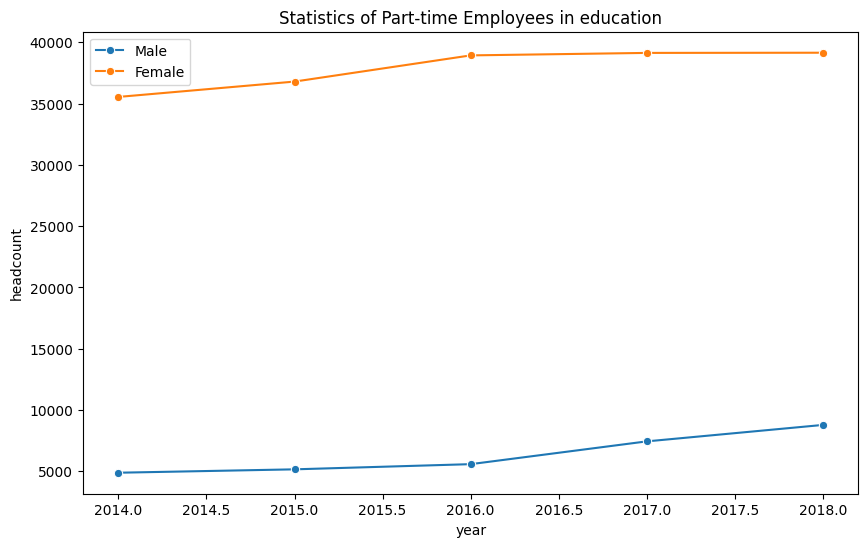

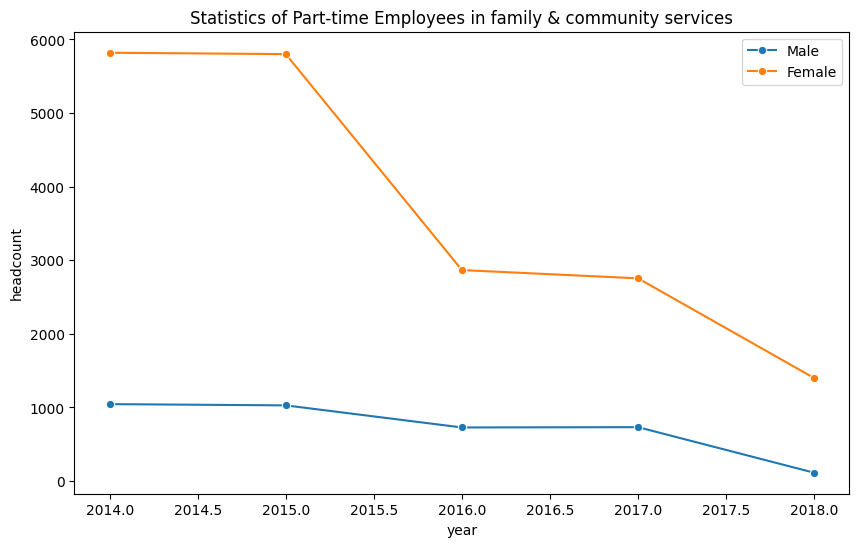

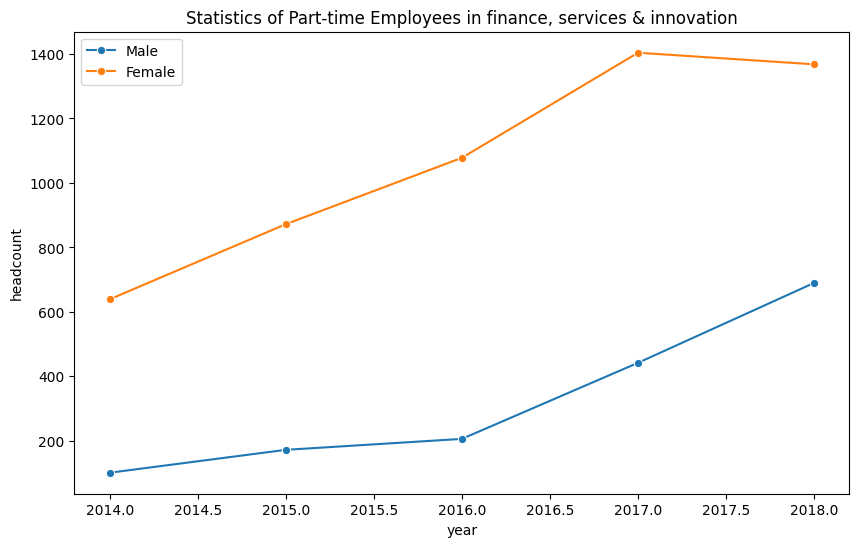

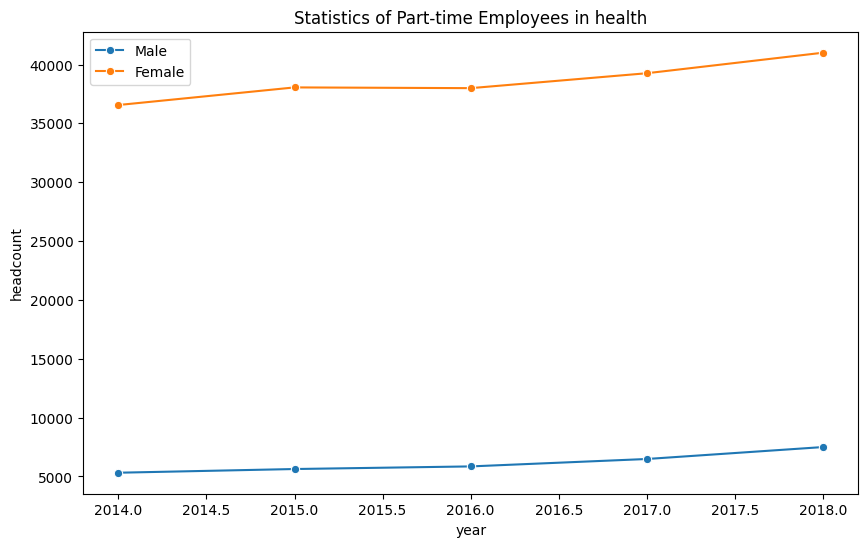

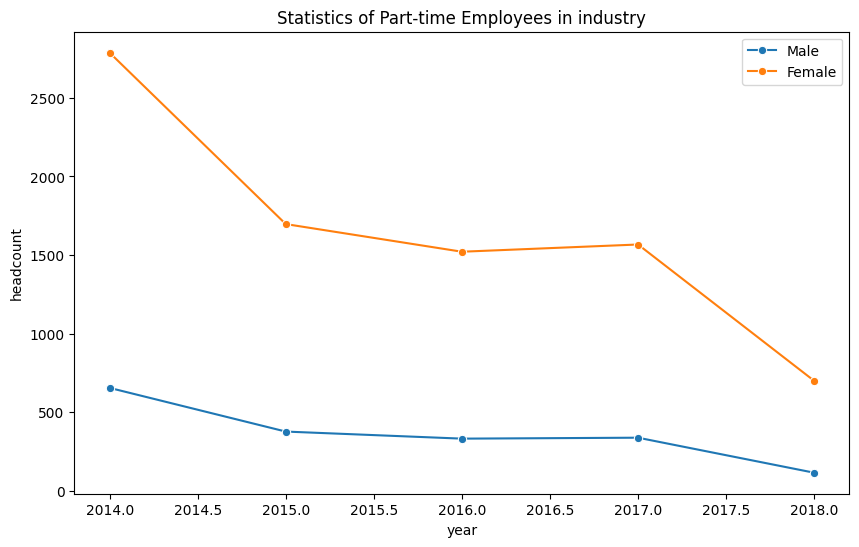

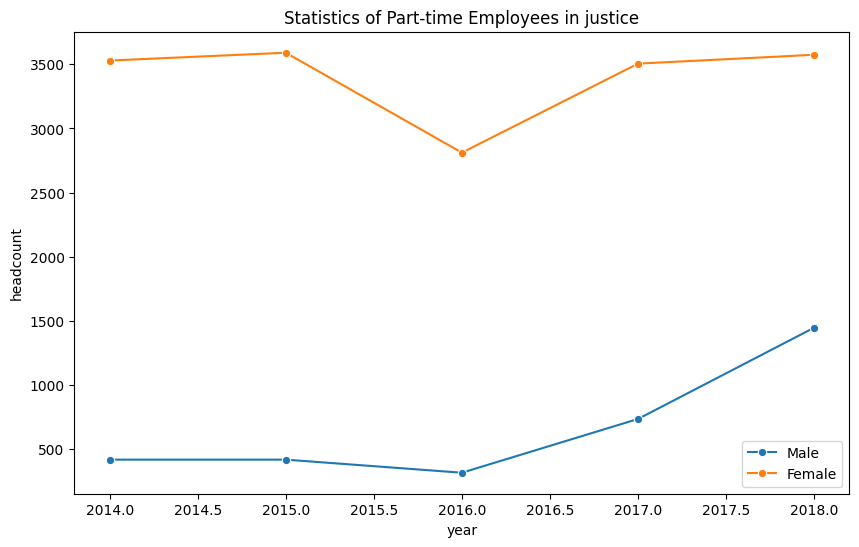

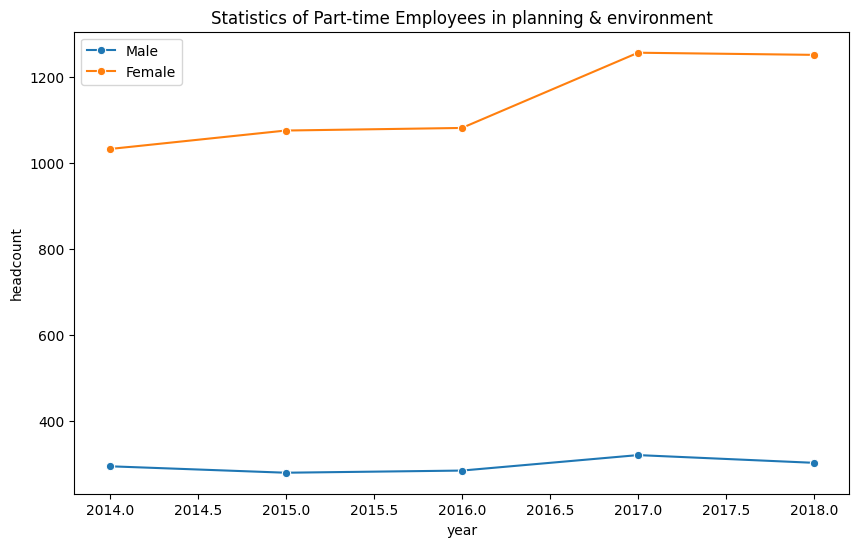

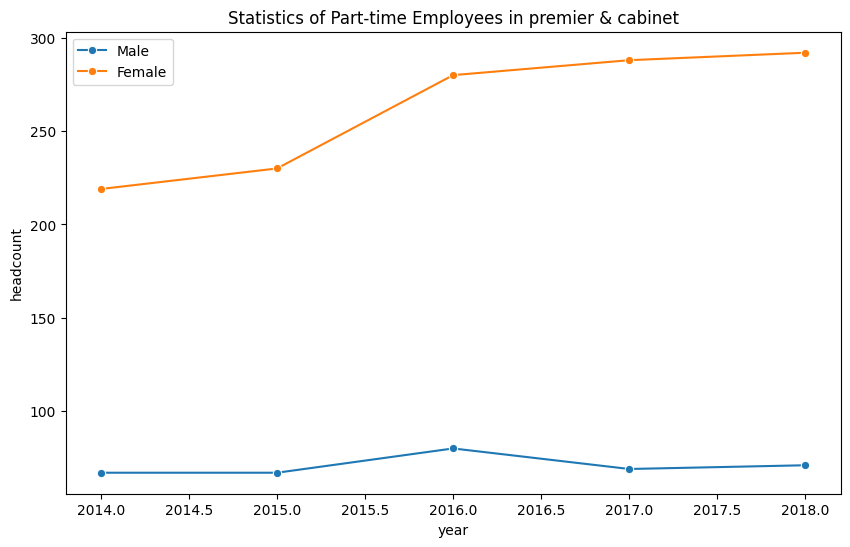

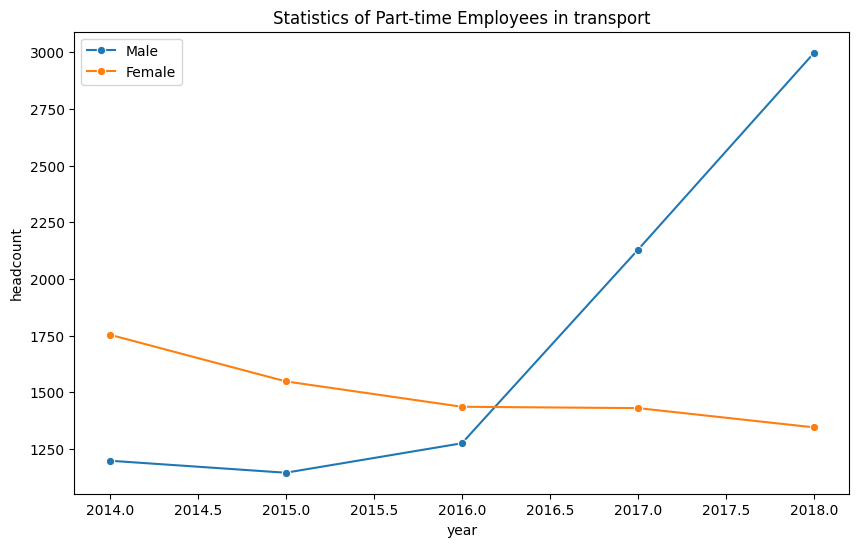

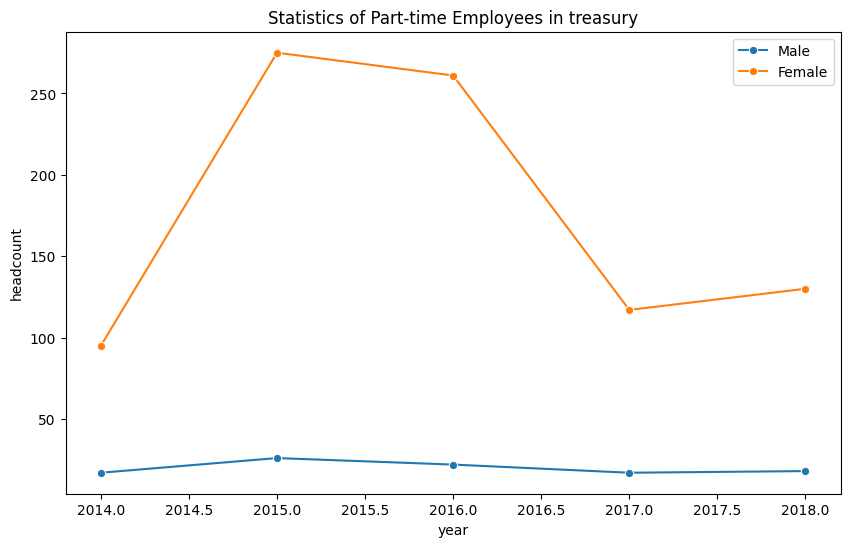

In [17]:
# Filter data for male part-time employees
male_pt_data = df[(df.gender=='male') & (df['pt/ft']=='part-time')]

# Group by year and cluster to calculate the headcount
male_pt_stats = male_pt_data.groupby(['year', 'cluster']).headcount.sum().reset_index()

# Filter data for female part-time employees
female_pt_data = df[(df.gender=='female') & (df['pt/ft']=='part-time')]

# Group by year and cluster to calculate the headcount
female_pt_stats = female_pt_data.groupby(['year', 'cluster']).headcount.sum().reset_index()

# Loop over sectors to plot statistics for male and female part-time employees
sectors = ['education', 'family & community services', 'finance, services & innovation', 'health', 'industry', 'justice',
           'planning & environment', 'premier & cabinet', 'transport', 'treasury']

for sector in sectors:
    male_sector_data = male_pt_stats[male_pt_stats.cluster == sector]
    female_sector_data = female_pt_stats[female_pt_stats.cluster == sector]
    
    plt.figure(figsize=(10, 6))
    plt.title('Statistics of Part-time Employees in {}'.format(sector))
    
    # Plot male part-time employees
    sns.lineplot(x=male_sector_data.year, y=male_sector_data.headcount, marker='o', label='Male')
    
    # Plot female part-time employees
    sns.lineplot(x=female_sector_data.year, y=female_sector_data.headcount, marker='o', label='Female')
    
    plt.legend()
    plt.show()

#### Part 5: Projection of Part-Time Employee Representation by 2025

C:\Users\wyunn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


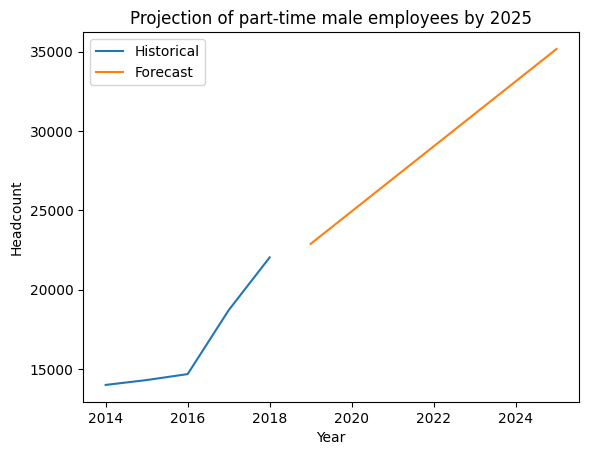

C:\Users\wyunn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


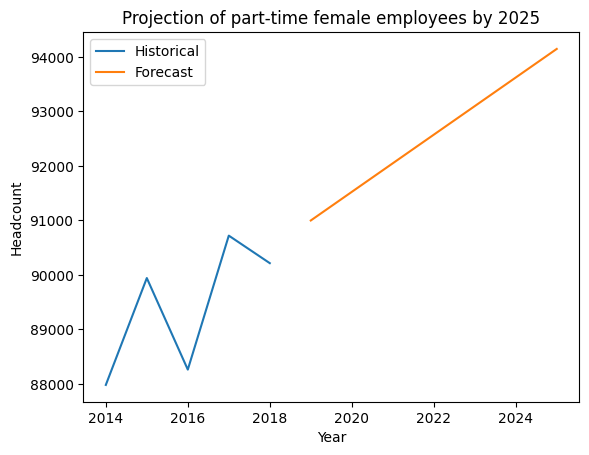

In [18]:
# Preprocess the data
df.columns = df.columns.str.lower()
for col in ['cluster', 'agency', 'pt/ft', 'gender']:
    df[col] = df[col].str.lower()

# Filter data for part-time male and female employees
pt_male = df[(df.gender == 'male') & (df['pt/ft'] == 'part-time')]
pt_female = df[(df.gender == 'female') & (df['pt/ft'] == 'part-time')]

# Group by year and compute total headcount for each year
time_pt_male = pt_male.groupby('year').headcount.sum()
time_pt_female = pt_female.groupby('year').headcount.sum()

# Transform to DataFrame
time_pt_male = pd.DataFrame(time_pt_male)
time_pt_female = pd.DataFrame(time_pt_female)

# Reset index
time_pt_male = time_pt_male.reset_index()
time_pt_female = time_pt_female.reset_index()

# Use linear regression to predict future values
def predict_future(df, gender, end_year):
    model = LinearRegression()
    model.fit(df[['year']], df['headcount'])
    
    future_years = np.array(range(df.year.max()+1, end_year+1)).reshape(-1, 1)
    forecast = model.predict(future_years)
    
    plt.plot(df['year'], df['headcount'], label='Historical')
    plt.plot(future_years, forecast, label='Forecast')
    plt.title(f'Projection of part-time {gender} employees by {end_year}')
    plt.xlabel('Year')
    plt.ylabel('Headcount')
    plt.legend()
    plt.show()

# Predict for male and female part-time employees until 2025
predict_future(time_pt_male, 'male', 2025)
predict_future(time_pt_female, 'female', 2025)
